# Wines Points prediction 

In [2]:
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../')

Here we will try to predict the points a wine will get based on known characteristics (i.e. features, in the ML terminology). The mine point in this stage is to establish a simple, ideally super cost effective, basline.
In the real world there is a tradeoff between complexity and perforamnce, and the DS job, among others, is to present a tradeoff tables of what performance is achivalbel at what complexity level. 

to which models with increased complexity and resource demands will be compared. Complexity should then be translated into cost. For example:
 * Compute cost 
 * Maintenance cost
 * Serving costs (i.e. is new platform needed?) 
 

## Loading the data

In [3]:
import pandas as pd
#import cufflinks as cf; cf.go_offline()

In [4]:
wine_reviews = pd.read_csv("C:\\Users\\eranb\Python_ML_2023\\data\\winemag-data-130k-v2.csv")
wine_reviews.shape


(129971, 14)

In [64]:
#wine_reviews.head()

In [5]:
wine_reviews1=wine_reviews.drop(['taster_twitter_handle','title','region_1','region_2'], axis=1)


In [69]:
#wine_reviews1.points.value_counts().sort_index()

In [6]:
wine_reviews1.dropna(subset=['price'], inplace=True)
wine_reviews1.dropna(subset=['designation'], inplace=True)
wine_reviews1.dropna(subset=['province'], inplace=True)
wine_reviews1.dropna(subset=['variety'], inplace=True)
wine_reviews1.head()

,Unnamed: 0,country,description,designation,points,price,province,taster_name,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Roger Voss,Portuguese Red,Quinta dos Avidagos
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Alexander Peartree,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Paul Gregutt,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Michael Schachner,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Kerin O’Keefe,Frappato,Terre di Giurfo


In [7]:
#no na taster 
wine_reviews11=wine_reviews1.dropna(subset=['taster_name'])

wine_reviews11.shape


(69919, 10)

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Assuming the DataFrame is already loaded and named wine_reviews1

# Calculate the average points for each taster
#average_points = wine_reviews1.groupby('taster_name')['points'].mean()

# Create the graph
#plt.figure(figsize=(10, 6))
#average_points.plot(kind='bar')
#plt.xlabel('Taster Name')
#plt.ylabel('Average Points')
#plt.title('Average Points by Taster')
#plt.xticks(rotation=45)
#plt.ylim(80, 100)
#plt.show()

In [8]:
wine_reviews11.sample(5)

,Unnamed: 0,country,description,designation,points,price,province,taster_name,variety,winery
110263,110263,US,"Along with the Carmenère from Reininger, this ...",Avant Garde,90,24.0,Washington,Paul Gregutt,Carmenère,Nodland
11195,11195,France,This special wine begins with stunning aromas ...,Les Chirats de Saint-Christophe,95,120.0,Rhône Valley,Joe Czerwinski,Syrah,Les Vins de Vienne
65689,65689,US,Waxy lemon peel accents savory apple and quinc...,Dry,86,16.0,New York,Anna Lee C. Iijima,Riesling,Suhru
76210,76210,US,This winery always manages to pack in rich fru...,San Benito County,94,39.0,California,Matt Kettmann,Pinot Noir,Williams Selyem
7451,7451,France,"Quite forward in character, this opens with p...",B&G Réserve,86,9.0,Languedoc-Roussillon,Lauren Buzzeo,Grenache Noir,Barton & Guestier


In [8]:
wine_reviews111=wine_reviews11.drop(['Unnamed: 0'], axis=1)

In [10]:
#wine_reviews111.sample(3)

In [ ]:
wine_reviews111

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:

#wine_reviews11

#X = wine_reviews11[['description','designation','Price', 'taster_name', 'variety', 'winery']].copy()
X = wine_reviews11[['price','variety', 'winery']].copy()
y = wine_reviews11['points'].copy()

#X['designation'] = pd.Categorical(X['designation'])
#X['designation'] = X['designation'].cat.codes

X['variety'] = pd.Categorical(X['variety'])
X['variety'] = X['variety'].cat.codes

X['winery'] = pd.Categorical(X['winery'])
X['winery'] = X['winery'].cat.codes



In [15]:
scaler = StandardScaler()
X[['price']] = scaler.fit_transform(X[['price']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32)

loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

Epoch 1/10
1748/1748 [==============================] - 2s 820us/step - loss: 15712.9219
Epoch 2/10
1748/1748 [==============================] - 1s 805us/step - loss: 704.2283
Epoch 3/10
1748/1748 [==============================] - 1s 794us/step - loss: 665.1739
Epoch 4/10
1748/1748 [==============================] - 1s 822us/step - loss: 594.9208
Epoch 5/10
1748/1748 [==============================] - 1s 796us/step - loss: 523.8774
Epoch 6/10
1748/1748 [==============================] - 1s 809us/step - loss: 367.2619
Epoch 7/10
1748/1748 [==============================] - 1s 802us/step - loss: 164.0820
Epoch 8/10
1748/1748 [==============================] - 1s 796us/step - loss: 67.9226
Epoch 9/10
1748/1748 [==============================] - 1s 836us/step - loss: 49.4276
Epoch 10/10
437/437 [==============================] - 0s 689us/step - loss: 13.4013
Test Loss: 13.401307106018066


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = wine_reviews11
df = df.drop(columns=["Unnamed: 0"])  # Remove unnecessary column

df = df.dropna(subset=["description", "price"])  # Remove rows with missing values in description or price
df = df.reset_index(drop=True)

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(df["description"], df["price"], test_size=0.2, random_state=42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences)

X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=X_train_padded.shape[1])

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=X_train_padded.shape[1]))
model.add(LSTM(128))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train_padded, y_train, batch_size=64, epochs=10)

y_pred = model.predict(X_test_padded)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)




Epoch 1/10
874/874 [==============================] - 120s 135ms/step - loss: 1465.4664
Epoch 2/10
874/874 [==============================] - 119s 136ms/step - loss: 1218.7548
Epoch 3/10
874/874 [==============================] - 120s 137ms/step - loss: 1054.7534
Epoch 4/10
874/874 [==============================] - 120s 137ms/step - loss: 969.3793
Epoch 5/10
874/874 [==============================] - 121s 139ms/step - loss: 888.2119
Epoch 6/10
874/874 [==============================] - 121s 138ms/step - loss: 816.0210
Epoch 7/10
874/874 [==============================] - 418s 478ms/step - loss: 746.2902
Epoch 8/10
874/874 [==============================] - 117s 134ms/step - loss: 684.5018
Epoch 9/10
874/874 [==============================] - 118s 135ms/step - loss: 614.5326
Epoch 10/10
437/437 [==============================] - 9s 19ms/step
Mean Squared Error: 856.5611517273667
Mean Absolute Error: 15.293323258168193
R-squared: 0.270107249523137


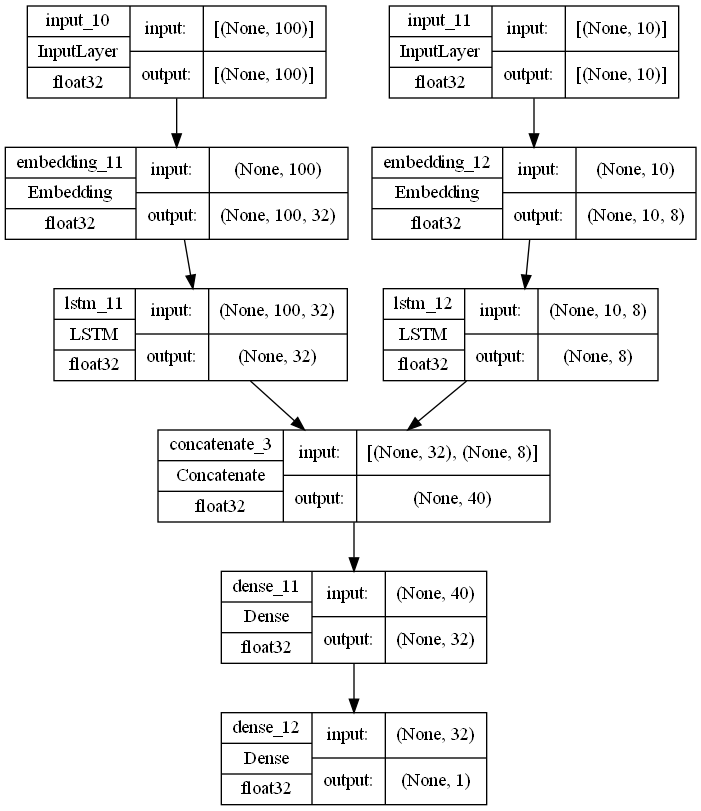

In [63]:
plot_model(model, show_dtype=True, show_shapes=True, show_layer_names=True, to_file='model_1.png')

In [ ]:
########################################################################
#שלישי





In [43]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

data = wine_reviews11
df = data[['description', 'winery', 'points']]
df = df.dropna()

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

tokenizer_desc = Tokenizer()
tokenizer_desc.fit_on_texts(train_df['description'])
train_sequences_desc = tokenizer_desc.texts_to_sequences(train_df['description'])
test_sequences_desc = tokenizer_desc.texts_to_sequences(test_df['description'])

tokenizer_winery = Tokenizer()
tokenizer_winery.fit_on_texts(train_df['winery'])
train_sequences_winery = tokenizer_winery.texts_to_sequences(train_df['winery'])
test_sequences_winery = tokenizer_winery.texts_to_sequences(test_df['winery'])

max_len_desc = 100 
max_len_winery = 20  
train_data_desc = pad_sequences(train_sequences_desc, maxlen=max_len_desc)
test_data_desc = pad_sequences(test_sequences_desc, maxlen=max_len_desc)

train_data_winery = pad_sequences(train_sequences_winery, maxlen=max_len_winery)
test_data_winery = pad_sequences(test_sequences_winery, maxlen=max_len_winery)

max_points = df['points'].max()
train_labels = train_df['points'] / max_points
test_labels = test_df['points'] / max_points

input_desc = tf.keras.Input(shape=(max_len_desc,))
embedding_desc = tf.keras.layers.Embedding(len(tokenizer_desc.word_index) + 1, 50)(input_desc)
lstm_desc = tf.keras.layers.LSTM(64)(embedding_desc)

input_winery = tf.keras.Input(shape=(max_len_winery,))
embedding_winery = tf.keras.layers.Embedding(len(tokenizer_winery.word_index) + 1, 10)(input_winery)
lstm_winery = tf.keras.layers.LSTM(16)(embedding_winery)

concat = tf.keras.layers.Concatenate()([lstm_desc, lstm_winery])
dense1 = tf.keras.layers.Dense(64, activation='relu')(concat)
output = tf.keras.layers.Dense(1, activation='linear')(dense1)

model = tf.keras.Model(inputs=[input_desc, input_winery], outputs=output)


In [44]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit([train_data_desc, train_data_winery], train_labels, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1399/1399 [==============================] - 46s 31ms/step - loss: 0.0055 - val_loss: 3.2426e-04
Epoch 2/10
1399/1399 [==============================] - 44s 31ms/step - loss: 2.4960e-04 - val_loss: 3.1255e-04
Epoch 3/10
1399/1399 [==============================] - 44s 31ms/step - loss: 2.0040e-04 - val_loss: 2.5994e-04
Epoch 4/10
1399/1399 [==============================] - 44s 31ms/step - loss: 1.8646e-04 - val_loss: 3.9831e-04
Epoch 5/10
1399/1399 [==============================] - 45s 32ms/step - loss: 1.6024e-04 - val_loss: 3.2918e-04
Epoch 6/10
1399/1399 [==============================] - 45s 32ms/step - loss: 1.3968e-04 - val_loss: 2.7643e-04
Epoch 7/10
1399/1399 [==============================] - 45s 32ms/step - loss: 1.3302e-04 - val_loss: 2.6384e-04
Epoch 8/10
1399/1399 [==============================] - 44s 32ms/step - loss: 1.1249e-04 - val_loss: 2.6985e-04
Epoch 9/10
1399/1399 [==============================] - 44s 32ms/step - loss: 9.8698e-05 - val_loss: 3.3450e

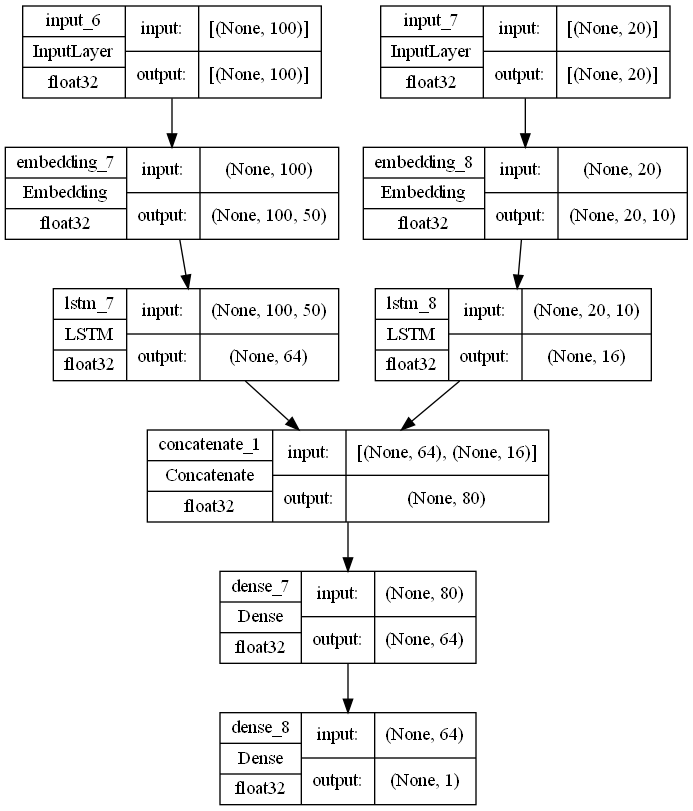

In [45]:
plot_model(model, show_dtype=True, show_shapes=True, show_layer_names=True, to_file='model_1.png')

In [46]:
loss = model.evaluate([test_data_desc, test_data_winery], test_labels)
print('Test Loss:', loss)

437/437 [==============================] - 4s 9ms/step - loss: 2.6877e-04
Test Loss: 0.0002687729138415307


In [48]:
predictions = model.predict([test_data_desc, test_data_winery])

predicted_points = predictions * max_points

results_df = pd.DataFrame({'Predicted Points': predicted_points.flatten(), 'Actual Points': test_df['points']})

print(results_df)

437/437 [==============================] - 4s 9ms/step
       Predicted Points  Actual Points
75907         91.583450             91
53832         85.283813             84
3814          87.611565             88
56984         94.073746             91
11971         85.139053             85
...                 ...            ...
1438          92.776970             92
84969         86.272827             86
85759         90.878983             90
91852         94.423607             95
62780         91.995148             93

[13984 rows x 2 columns]


In [ ]:
#######################רביעי

In [53]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

data = wine_reviews11
df = data[['description', 'winery', 'points']]
df = df.dropna()

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

tokenizer_desc = Tokenizer()
tokenizer_desc.fit_on_texts(train_df['description'])
train_sequences_desc = tokenizer_desc.texts_to_sequences(train_df['description'])
test_sequences_desc = tokenizer_desc.texts_to_sequences(test_df['description'])

tokenizer_winery = Tokenizer()
tokenizer_winery.fit_on_texts(train_df['winery'])
train_sequences_winery = tokenizer_winery.texts_to_sequences(train_df['winery'])
test_sequences_winery = tokenizer_winery.texts_to_sequences(test_df['winery'])


max_len_desc = 200  
max_len_winery = 30 
train_data_desc = pad_sequences(train_sequences_desc, maxlen=max_len_desc)
test_data_desc = pad_sequences(test_sequences_desc, maxlen=max_len_desc)

train_data_winery = pad_sequences(train_sequences_winery, maxlen=max_len_winery)
test_data_winery = pad_sequences(test_sequences_winery, maxlen=max_len_winery)

# Scale the points column to a range of 0-1
max_points = df['points'].max()
train_labels = train_df['points'] / max_points
test_labels = test_df['points'] / max_points





In [54]:
input_desc = tf.keras.Input(shape=(max_len_desc,))
embedding_desc = tf.keras.layers.Embedding(len(tokenizer_desc.word_index) + 1, 100)(input_desc) 
lstm_desc = tf.keras.layers.LSTM(128)(embedding_desc) 

input_winery = tf.keras.Input(shape=(max_len_winery,))
embedding_winery = tf.keras.layers.Embedding(len(tokenizer_winery.word_index) + 1, 20)(input_winery)  
lstm_winery = tf.keras.layers.LSTM(32)(embedding_winery) 

concat = tf.keras.layers.Concatenate()([lstm_desc, lstm_winery])
dense1 = tf.keras.layers.Dense(128, activation='relu')(concat)  
output = tf.keras.layers.Dense(1, activation='linear')(dense1)

model = tf.keras.Model(inputs=[input_desc, input_winery], outputs=output)


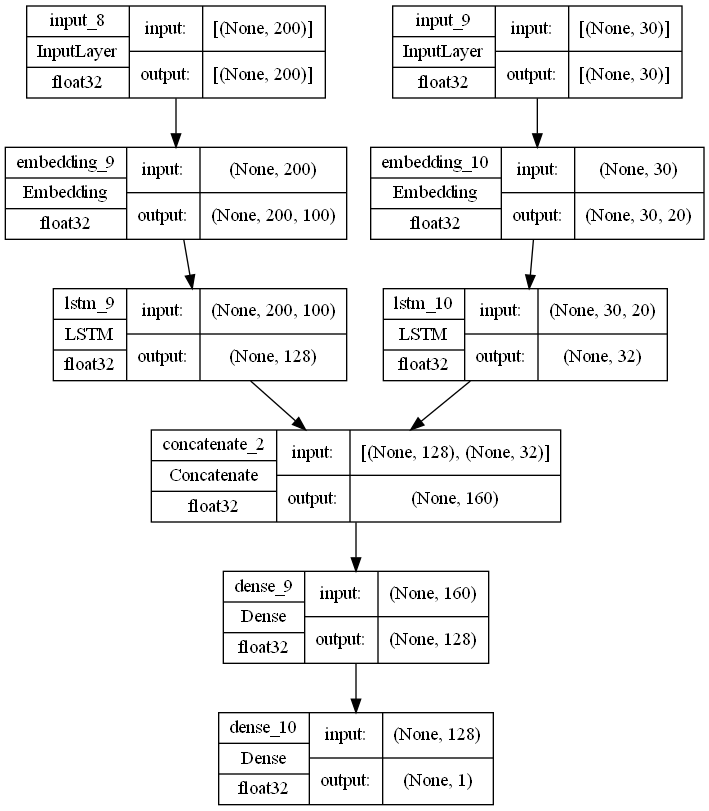

In [55]:
plot_model(model, show_dtype=True, show_shapes=True, show_layer_names=True, to_file='model_1.png')

In [56]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit([train_data_desc, train_data_winery], train_labels, batch_size=64, epochs=15, validation_split=0.2)

Epoch 1/15
700/700 [==============================] - 203s 287ms/step - loss: 0.0071 - val_loss: 3.4298e-04
Epoch 2/15
700/700 [==============================] - 172s 246ms/step - loss: 2.3783e-04 - val_loss: 2.8411e-04
Epoch 3/15
700/700 [==============================] - 175s 249ms/step - loss: 1.9100e-04 - val_loss: 3.7514e-04
Epoch 4/15
700/700 [==============================] - 177s 253ms/step - loss: 1.6793e-04 - val_loss: 2.7674e-04
Epoch 5/15
700/700 [==============================] - 176s 252ms/step - loss: 1.5153e-04 - val_loss: 2.7544e-04
Epoch 6/15
700/700 [==============================] - 185s 264ms/step - loss: 1.4116e-04 - val_loss: 2.7444e-04
Epoch 7/15
700/700 [==============================] - 184s 262ms/step - loss: 1.3526e-04 - val_loss: 2.7005e-04
Epoch 8/15
700/700 [==============================] - 182s 261ms/step - loss: 1.1685e-04 - val_loss: 4.5106e-04
Epoch 9/15
700/700 [==============================] - 188s 268ms/step - loss: 1.2171e-04 - val_loss: 2.7410e

In [57]:
loss = model.evaluate([test_data_desc, test_data_winery], test_labels)
print('Test Loss:', loss)

437/437 [==============================] - 14s 32ms/step - loss: 2.8872e-04
Test Loss: 0.0002887157606892288


In [58]:
0.0002687729138415307<0.0002887157606892288

True

In [59]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


df = data[['description', 'winery', 'points']]

df = df.dropna()

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

tokenizer_desc = Tokenizer()
tokenizer_desc.fit_on_texts(train_df['description'])
train_sequences_desc = tokenizer_desc.texts_to_sequences(train_df['description'])
test_sequences_desc = tokenizer_desc.texts_to_sequences(test_df['description'])

tokenizer_winery = Tokenizer()
tokenizer_winery.fit_on_texts(train_df['winery'])
train_sequences_winery = tokenizer_winery.texts_to_sequences(train_df['winery'])
test_sequences_winery = tokenizer_winery.texts_to_sequences(test_df['winery'])

max_len_desc = 100  
max_len_winery = 10  
train_data_desc = pad_sequences(train_sequences_desc, maxlen=max_len_desc)
test_data_desc = pad_sequences(test_sequences_desc, maxlen=max_len_desc)

train_data_winery = pad_sequences(train_sequences_winery, maxlen=max_len_winery)
test_data_winery = pad_sequences(test_sequences_winery, maxlen=max_len_winery)

max_points = df['points'].max()
train_labels = train_df['points'] / max_points
test_labels = test_df['points'] / max_points

input_desc = tf.keras.Input(shape=(max_len_desc,))
embedding_desc = tf.keras.layers.Embedding(len(tokenizer_desc.word_index) + 1, 32)(input_desc)  
lstm_desc = tf.keras.layers.LSTM(32)(embedding_desc)  # Decrease the number of LSTM units

input_winery = tf.keras.Input(shape=(max_len_winery,))
embedding_winery = tf.keras.layers.Embedding(len(tokenizer_winery.word_index) + 1, 8)(input_winery)  
lstm_winery = tf.keras.layers.LSTM(8)(embedding_winery) 
concat = tf.keras.layers.Concatenate()([lstm_desc, lstm_winery])
dense1 = tf.keras.layers.Dense(32, activation='relu')(concat)  
output = tf.keras.layers.Dense(1, activation='linear')(dense1)

model = tf.keras.Model(inputs=[input_desc, input_winery], outputs=output)


model.compile(loss='mean_squared_error', optimizer='adam')
model.fit([train_data_desc, train_data_winery], train_labels, batch_size=32, epochs=10, validation_split=0.2)


Epoch 1/10
1399/1399 [==============================] - 36s 24ms/step - loss: 0.0080 - val_loss: 3.3957e-04
Epoch 2/10
1399/1399 [==============================] - 33s 23ms/step - loss: 2.4437e-04 - val_loss: 2.7883e-04
Epoch 3/10
1399/1399 [==============================] - 33s 23ms/step - loss: 1.9431e-04 - val_loss: 3.1411e-04
Epoch 4/10
1399/1399 [==============================] - 33s 23ms/step - loss: 1.7034e-04 - val_loss: 2.7685e-04
Epoch 5/10
1399/1399 [==============================] - 33s 24ms/step - loss: 1.4503e-04 - val_loss: 3.5595e-04
Epoch 6/10
1399/1399 [==============================] - 33s 24ms/step - loss: 1.3766e-04 - val_loss: 3.2213e-04
Epoch 7/10
1399/1399 [==============================] - 33s 24ms/step - loss: 1.2665e-04 - val_loss: 2.9251e-04
Epoch 8/10
1399/1399 [==============================] - 35s 25ms/step - loss: 1.1439e-04 - val_loss: 2.8143e-04
Epoch 9/10
1399/1399 [==============================] - 33s 24ms/step - loss: 1.0456e-04 - val_loss: 2.6908e

In [60]:
# Evaluate the model on the test set
loss = model.evaluate([test_data_desc, test_data_winery], test_labels)
print('Test Loss:', loss)

437/437 [==============================] - 3s 6ms/step - loss: 2.7340e-04
Test Loss: 0.0002734005101956427


In [61]:
0.0002687729138415307/0.0002734005101956427

0.9830739293397786

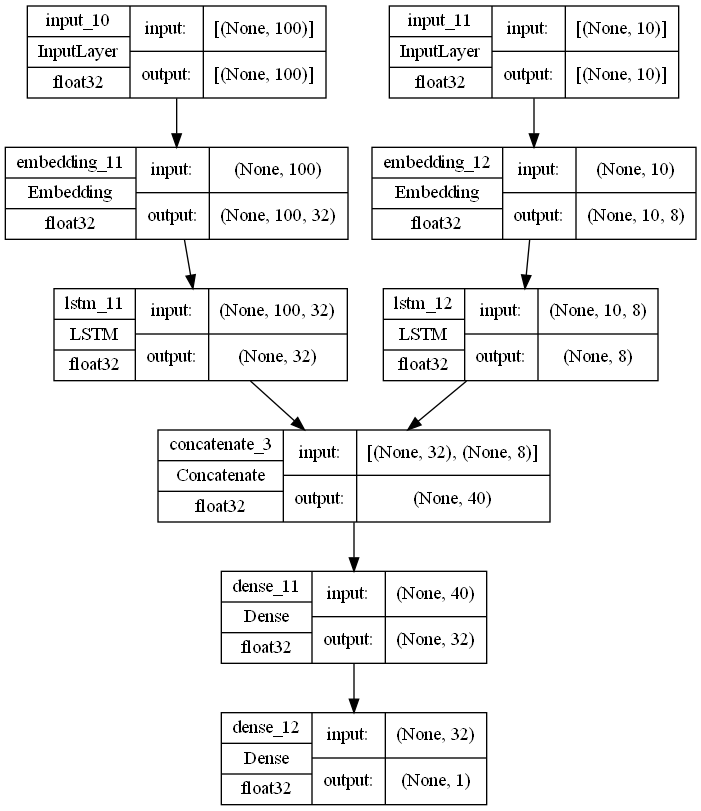

In [62]:
plot_model(model, show_dtype=True, show_shapes=True, show_layer_names=True, to_file='model_1.png')